In [ ]:
import pandas as pd

In [ ]:
#Install Kaggle API. Makes it easier to import data directly from Kaggle, instead of importing from computer
! mkdir ~/.kaggle

In [ ]:
#Install Kaggle API.
! pip install kaggle

In [ ]:
#Install Kaggle API. Need kaggle.json file. Instructions: https://www.kaggle.com/general/74235
! cp kaggle.json ~/.kaggle/

In [ ]:
#Install Kaggle API.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download Kaggle1 directly from Kaggle.com
! kaggle competitions download -c fake-news

 62% 23.0M/37.0M [00:01<00:01, 10.3MB/s]
100% 37.0M/37.0M [00:01<00:00, 21.4MB/s]
 53% 5.00M/9.42M [00:00<00:00, 14.4MB/s]
100% 9.42M/9.42M [00:00<00:00, 22.9MB/s]
  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 39.9MB/s]


In [ ]:
#Download Kaggle2 directly from Kaggle.com
! kaggle datasets download jruvika/fake-news-detection

100% 4.89M/4.89M [00:00<00:00, 18.4MB/s]



In [ ]:
#Unzip Kaggle 1 folder
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
#Unzip Kaggle 2 folder
!unzip /content/fake-news-detection.zip

Archive:  /content/fake-news-detection.zip
  inflating: data.csv                
  inflating: data.h5                 


In [ ]:
#Import both Kaggle1+2
kaggle2 = pd.read_csv("data.csv")
kaggle1 = pd.read_csv("train.csv")
kaggle1.info()
kaggle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
#Copy datasets - so I still retain the original dataset, and can refer back to the original if needed
df_kag1 = kaggle1.copy()
df_kag2 = kaggle2.copy()

In [ ]:
#Change column names for Kaggle2
df_kag2 = df_kag2.rename(columns={'Headline':'title','Label':'label', 'Body':'text'})
df_kag2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URLs    4009 non-null   object
 1   title   4009 non-null   object
 2   text    3988 non-null   object
 3   label   4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
#Remove nulls from 'title' in Kaggle1
df_kag1 = df_kag1[df_kag1['title'].notna()]
df_kag1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   author  18285 non-null  object
 3   text    20203 non-null  object
 4   label   20242 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 948.8+ KB


In [ ]:
#Merge datasets
df_union1 = pd.concat([df_kag1, 
                       df_kag2], ignore_index=True)
df_union1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24251 entries, 0 to 24250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20242 non-null  float64
 1   title   24251 non-null  object 
 2   author  18285 non-null  object 
 3   text    24191 non-null  object 
 4   label   24251 non-null  int64  
 5   URLs    4009 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
#Drop features not being used: 'news_url','tweet_ids','author','text','URLs','Body'
features_dropped = ['URLs']
df_union1 = df_union1.drop(features_dropped, axis=1)
df_union1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24251 entries, 0 to 24250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20242 non-null  float64
 1   title   24251 non-null  object 
 2   author  18285 non-null  object 
 3   text    24191 non-null  object 
 4   label   24251 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 947.4+ KB


In [ ]:
#Check duplicates - no duplicates
df_union1.shape , df_union1.drop_duplicates().shape

((24251, 6), (24251, 6))

In [ ]:
#Merge 'title' and 'text' to create 'total' 
df_union1['total']=df_union1['title']+' '+df_union1['text']
df_union1.shape

(24251, 7)

In [ ]:
#Convert 'total' to a string
df_union1['total']=df_union1['total'].apply(str)

In [ ]:
#Import NLTK libraries. Used for data preprocessing.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Data preprocessing: stop words, tokenize, stemming
ps = PorterStemmer()
def stop_stem(text):
    text = re.sub('[^a-zA-Z]', ' ',text) #SYMBOLS: this basically replaces everything other than lower a-z & upper A-Z with a ' ', for eg apple,bananna --> apple bananna
    text = text.lower() #LOWERCASE
    text = text.split() #TOKENIZE: .split() splits the line into words with delimiter as ' '
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')] #STEM: basically remove all the stopwords and apply stemming to the final data
    text = ' '.join(text) # this basically joins back and returns the cleaned sentence
    return text

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Apply stop words, tokenization, stemming
df_union1['total'] = df_union1['total'].apply(stop_stem)

In [ ]:
#Data After Preprocessing
df_union1.head()

,id,title,author,text,label,URLs,total
0,0.0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,hous dem aid even see comey letter jason chaff...
1,1.0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,flynn hillari clinton big woman campu breitbar...
2,2.0,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,truth might get fire truth might get fire octo...
3,3.0,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,civilian kill singl us airstrik identifi video...
4,4.0,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,iranian woman jail fiction unpublish stori wom...


In [ ]:
#Independent variable: 'title'; Dependent variable: 'label'
X = df_union1['total']
Y = df_union1['label']

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
X = tfidf_vectorizer.fit_transform(df_union1['total'])
X.shape

(24251, 10000)

In [ ]:
#Split the entire dataset into training and test set, 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
#Split the training set into training2 and validation, 70:30
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [ ]:
#Create metrics table for VALIDATION set. 
#Training Set Results: Shows how well model performs on the training data. Initial test for the model to get a feel for the data. 
#Validation Set Results: More important - shows how generalizable the data is. This is reflective of how the model will perform in the wild. 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate1(model, x_train2, x_val, y_train, y_val):
    y_train_pred = model.predict(x_train2)
    y_test_pred = model.predict(x_val)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("VALIDATION SET RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_val, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_val, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_val, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#Logistic Regression - Train-Validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
#Fitting training set to the model
lr.fit(x_train2,y_train2)
#Metrics report
evaluate1(lr, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[6701  320]
 [ 181 6378]]
ACCURACY SCORE:
0.9631
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.973700     0.952225  0.963108      0.962962      0.963327
recall        0.954422     0.972404  0.963108      0.963413      0.963108
f1-score      0.963965     0.962209  0.963108      0.963087      0.963116
support    7021.000000  6559.000000  0.963108  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2806  194]
 [ 164 2656]]
ACCURACY SCORE:
0.9385
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.944781     0.931930  0.938488     0.938355      0.938554
recall        0.935333     0.941844  0.938488     0.938589      0.938488
f1-score      0.940034     0.936861  0.938488     0.938447      0.938496
support    3000.000000  2820.000000  0.938488  5820.000000   5820.000000


In [ ]:
#Support Vector Machine - Train-Validate
from sklearn import svm
svm = svm.SVC()
#Fitting training set to the model
svm.fit(x_train2,y_train2)
#Metrics report
evaluate1(svm, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[6983   38]
 [  36 6523]]
ACCURACY SCORE:
0.9946
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.994871     0.994208  0.994551      0.994540      0.994551
recall        0.994588     0.994511  0.994551      0.994550      0.994551
f1-score      0.994729     0.994360  0.994551      0.994545      0.994551
support    7021.000000  6559.000000  0.994551  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2816  184]
 [ 134 2686]]
ACCURACY SCORE:
0.9454
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.954576     0.935889  0.945361     0.945232      0.945521
recall        0.938667     0.952482  0.945361     0.945574      0.945361
f1-score      0.946555     0.944112  0.945361     0.945334      0.945371
support    3000.000000  2820.000000  0.945361  5820.000000   5820.000000


In [ ]:
#K-Nearest Neighbors - Train-Validate
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
#Fitting training set to the model
knn.fit(x_train2,y_train2)
#Metrics report
evaluate1(knn, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3450 3571]
 [ 170 6389]]
ACCURACY SCORE:
0.7245
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.953039     0.641466  0.724521      0.797252      0.802552
recall        0.491383     0.974081  0.724521      0.732732      0.724521
f1-score      0.648435     0.773534  0.724521      0.710984      0.708856
support    7021.000000  6559.000000  0.724521  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[ 951 2049]
 [  92 2728]]
ACCURACY SCORE:
0.6321
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.911793     0.571070  0.632131     0.741431      0.746700
recall        0.317000     0.967376  0.632131     0.642188      0.632131
f1-score      0.470443     0.718178  0.632131     0.594310      0.590480
support    3000.000000  2820.000000  0.632131  5820.000000   5820.000000


In [ ]:
#Voting ensemble - Train-Validate
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(('Logistic', lr))

estimators.append(('SVM', svm))

estimators.append(('KNN', knn))

voting = VotingClassifier(estimators=estimators)
voting.fit(x_train2, y_train2)

evaluate1(voting, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[6779  242]
 [  56 6503]]
ACCURACY SCORE:
0.9781
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.991807     0.964122  0.978056      0.977964      0.978435
recall        0.965532     0.991462  0.978056      0.978497      0.978056
f1-score      0.978493     0.977601  0.978056      0.978047      0.978062
support    7021.000000  6559.000000  0.978056  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2792  208]
 [ 131 2689]]
ACCURACY SCORE:
0.9418
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.955183     0.928202  0.941753     0.941692      0.942110
recall        0.930667     0.953546  0.941753     0.942106      0.941753
f1-score      0.942765     0.940703  0.941753     0.941734      0.941766
support    3000.000000  2820.000000  0.941753  5820.000000   5820.000000


In [ ]:
#Parameter tuning - GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logistic Regression - hyperparameter options
lr_param = {  
  'solver':['liblinear'],
  'C': [0.001,0.01,0.1,1,10,100],
  'penalty': ['l1','l2']
}

In [ ]:
#Logistic Regression - optimal parameters
lr_grid = GridSearchCV(lr,lr_param)
lr_grid.fit(x_train2,y_train2)
lr_grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#SVM - hyperparameter options
svm_param = {
  'C': [0.1, 1, 10, 100, 1000], 
  'gamma': [1, 0.1, 0.01, 0.001],
  'kernel': ['rbf']
}

In [ ]:
#SVM - optimal parameters
svm_grid = GridSearchCV(svm,svm_param,refit = True, verbose = 3)
svm_grid.fit(x_train2,y_train2)
svm_grid.best_estimator_

In [ ]:
#KNN - hyperparameter options
knn_param = {
  'n_neighbors': list(range(1,5)),
  'leaf_size': list(range(1,5)),
  'p': [1,2]
}

In [ ]:
#KNN - optimal parameters
knn_grid = GridSearchCV(knn,knn_param)
knn_grid.fit(x_train2,y_train2)
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#OPTIMIZED - logistic regression
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=10, solver='liblinear', penalty='l2')
#Fitting training set to the model
lr2.fit(x_train2,y_train2)
#Metrics report
evaluate1(lr2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[6979   42]
 [  30 6529]]
ACCURACY SCORE:
0.9947
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.995720     0.993608  0.994698      0.994664      0.994700
recall        0.994018     0.995426  0.994698      0.994722      0.994698
f1-score      0.994868     0.994516  0.994698      0.994692      0.994698
support    7021.000000  6559.000000  0.994698  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2822  178]
 [ 154 2666]]
ACCURACY SCORE:
0.9430
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.948253     0.937412  0.942955     0.942832      0.943000
recall        0.940667     0.945390  0.942955     0.943028      0.942955
f1-score      0.944444     0.941384  0.942955     0.942914      0.942962
support    3000.000000  2820.000000  0.942955  5820.000000   5820.000000


In [ ]:
#OPTIMIZED - SVM
from sklearn.svm import SVC
svm2 = SVC(C=100, gamma=1, kernel='rbf')
#Fitting training set to the model
svm2.fit(x_train2,y_train2)
#Metrics report
evaluate1(svm2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[7010   11]
 [   1 6558]]
ACCURACY SCORE:
0.9991
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.999857     0.998325  0.999116      0.999091      0.999117
recall        0.998433     0.999848  0.999116      0.999140      0.999116
f1-score      0.999145     0.999086  0.999116      0.999115      0.999116
support    7021.000000  6559.000000  0.999116  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2837  163]
 [ 138 2682]]
ACCURACY SCORE:
0.9483
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.953613     0.942707  0.948282     0.948160      0.948329
recall        0.945667     0.951064  0.948282     0.948365      0.948282
f1-score      0.949623     0.946867  0.948282     0.948245      0.948288
support    3000.000000  2820.000000  0.948282  5820.000000   5820.000000


In [ ]:
#OPTIMIZED - KNN
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=11, p=2)
#Fitting training set to the model
knn2.fit(x_train2,y_train2)
#Metrics report
evaluate1(knn2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[1479 5542]
 [  46 6513]]
ACCURACY SCORE:
0.5885
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.969836     0.540274  0.588513      0.755055      0.762362
recall        0.210654     0.992987  0.588513      0.601820      0.588513
f1-score      0.346127     0.699796  0.588513      0.522961      0.516945
support    7021.000000  6559.000000  0.588513  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[ 590 2410]
 [  22 2798]]
ACCURACY SCORE:
0.5821
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.964052     0.537250  0.582131     0.750651      0.757251
recall        0.196667     0.992199  0.582131     0.594433      0.582131
f1-score      0.326689     0.697060  0.582131     0.511875      0.506147
support    3000.000000  2820.000000  0.582131  5820.000000   5820.000000


In [ ]:
#OPTIMIZED - Voting ensemble
from sklearn.ensemble import VotingClassifier

estimators1 = []
estimators1.append(('Logistic', lr2))

estimators1.append(('SVM', svm2))

estimators1.append(('KNN', knn2))

voting2 = VotingClassifier(estimators=estimators1)
voting2.fit(x_train2, y_train2)

evaluate1(voting2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[6980   41]
 [   8 6551]]
ACCURACY SCORE:
0.9964
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.998855     0.993780  0.996392      0.996318      0.996404
recall        0.994160     0.998780  0.996392      0.996470      0.996392
f1-score      0.996502     0.996274  0.996392      0.996388      0.996392
support    7021.000000  6559.000000  0.996392  13580.000000  13580.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[2810  190]
 [ 122 2698]]
ACCURACY SCORE:
0.9464
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.958390     0.934211  0.946392     0.946300      0.946674
recall        0.936667     0.956738  0.946392     0.946702      0.946392
f1-score      0.947404     0.945340  0.946392     0.946372      0.946404
support    3000.000000  2820.000000  0.946392  5820.000000   5820.000000


In [ ]:
#FINAL TEST - create metrics table

def evaluate_final(model, x_train, x_test, y_train, y_test):
    y_test_pred = model.predict(x_test)

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#FINAL TEST - LR

lr_final = LogisticRegression(C=10, solver='liblinear', penalty='l2')
#Fitting training set to the model
lr_final.fit(x_train,y_train)
#Metrics report
evaluate_final(lr_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[2338  165]
 [ 134 2214]]
ACCURACY SCORE:
0.9384
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.945793     0.930643  0.938363     0.938218      0.938460
recall        0.934079     0.942930  0.938363     0.938505      0.938363
f1-score      0.939899     0.936746  0.938363     0.938323      0.938373
support    2503.000000  2348.000000  0.938363  4851.000000   4851.000000


In [ ]:
#FINAL TEST - SVM

svm_final = SVC(C=100, gamma=1, kernel='rbf', probability=True)
#Fitting training set to the model
svm_final.fit(x_train,y_train)
#Metrics report
evaluate_final(svm_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[2347  156]
 [ 121 2227]]
ACCURACY SCORE:
0.9429
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.950972     0.934536  0.942898     0.942754      0.943017
recall        0.937675     0.948467  0.942898     0.943071      0.942898
f1-score      0.944277     0.941450  0.942898     0.942863      0.942909
support    2503.000000  2348.000000  0.942898  4851.000000   4851.000000


In [ ]:
#FINAL TEST - KNN

knn_final = KNeighborsClassifier(leaf_size=1, n_neighbors=4, p=2)
#Fitting training set to the model
knn_final.fit(x_train,y_train)
#Metrics report
evaluate_final(knn_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[ 906 1597]
 [ 116 2232]]
ACCURACY SCORE:
0.6469
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.886497     0.582920  0.646877     0.734708      0.739558
recall        0.361966     0.950596  0.646877     0.656281      0.646877
f1-score      0.514043     0.722681  0.646877     0.618362      0.615029
support    2503.000000  2348.000000  0.646877  4851.000000   4851.000000


In [ ]:
#FINAL TEST - Voting

estimators2 = []
estimators2.append(('Logistic', lr_final))

estimators2.append(('SVM', svm_final))

estimators2.append(('KNN', knn_final))

voting_final = VotingClassifier(estimators=estimators)
voting_final.fit(x_train, y_train)

evaluate_final(voting_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[2305  198]
 [ 114 2234]]
ACCURACY SCORE:
0.9357
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.952873     0.918586  0.935683     0.935729      0.936277
recall        0.920895     0.951448  0.935683     0.936171      0.935683
f1-score      0.936611     0.934728  0.935683     0.935670      0.935700
support    2503.000000  2348.000000  0.935683  4851.000000   4851.000000


In [ ]:
#FINAL AUC-ROC curve setup - Soft voting
voting3 = VotingClassifier(estimators=estimators2, voting='soft')
voting3.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, co...
                                  decision_function_shape='ovr', degree=3,
                                  g

In [ ]:
#FINAL AUC-ROC curve setup - Create probability prediction 
y_pred_logistic1 = lr_final.decision_function(x_test)
y_pred_svm1 = svm_final.decision_function(x_test)
y_pred_knn1 = knn_final.predict_proba(x_test)
y_pred_vote1 = voting3.predict_proba(x_test)

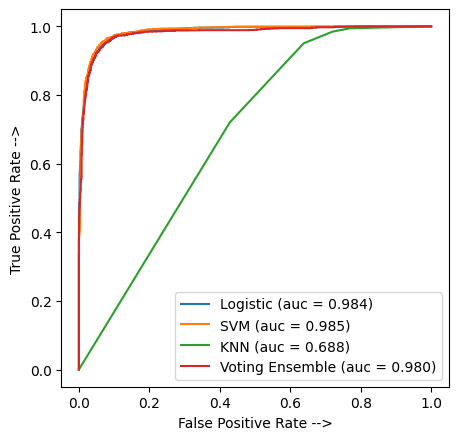

In [ ]:
#FINAL AUC-ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#LR - create curve
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic1)
auc_logistic_final = auc(logistic_fpr, logistic_tpr)
#SVM - create curve
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm1)
auc_svm_final = auc(svm_fpr, svm_tpr)
#KNN - create curve
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn1[:,1])
auc_knn_final = auc(knn_fpr, knn_tpr)
#Vote - create curve
vote_fpr, vote_tpr, threshold = roc_curve(y_test, y_pred_vote1[:,1])
auc_vote_final = auc(vote_fpr, vote_tpr)

#Plot curves
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_logistic_final)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm_final)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn_final)
plt.plot(vote_fpr, vote_tpr, linestyle='-', label='Voting Ensemble (auc = %0.3f)' % auc_vote_final)

#Create axes 
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

#Show legend
plt.legend()

plt.show()

In [ ]:
#Feature weights - logisitic regression 
zipped = list(zip(tfidf_vectorizer.get_feature_names(), lr.coef_[0]))
zipped

In [ ]:
df_fw = pd.DataFrame(zipped, columns = ['Feature', 'Weight'])
df_fw_fake = df_fw.sort_values(by='Weight', ascending=False)[:10]
df_fw_fact = df_fw.sort_values(by='Weight', ascending=True)[:10]

In [ ]:
df_fw_fake

,Feature,Weight
3411,hillari clinton,5.191115
9930,year old,4.736061
2628,file photo,3.749208
9025,twitter com,3.702127
6353,presid elect,3.538444
1571,continu read,3.243550
5525,octob reuter,3.152838
4427,main stori,3.004847
6631,read main,2.996943
6331,pravda ru,2.547623


In [ ]:
df_fw_fact

,Feature,Weight
9978,york time,-12.307878
5339,new york,-7.222538
7845,sourc http,-6.642344
899,breitbart news,-6.023849
6352,presid donald,-5.763279
5037,mr trump,-4.779451
7212,said mr,-4.680991
6385,presid trump,-4.267671
904,breitbart texa,-3.764628
2748,follow twitter,-3.653783


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

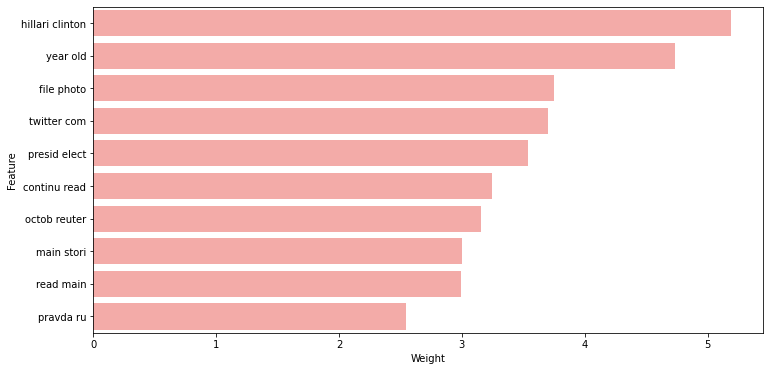

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Weight", y="Feature", data=df_fw_fake, color='r')

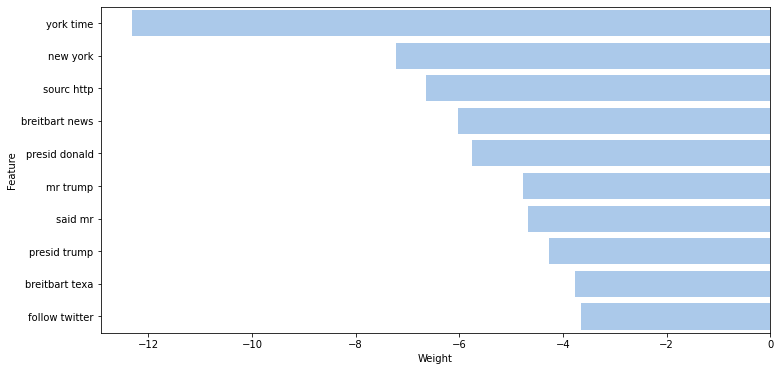

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Weight", y="Feature", data=df_fw_fact, color='b')